# VirES for Swarm - Virtual Research Environment

Computational environment based on the open source softwares *JupyterHub* and *JupyterLab* (see: https://jupyter.org/) allowing the users to access Swarm data, on the VirES server, via the [viresclient](https://viresclient.readthedocs.io/) Python package instead of the "graphic" access provided by the [VirES web interface](https://vires.services/) and to manipulate the retrieved data by executing code.

The programming language supported, by default, by JupyterLab is [Python](https://www.python.org/). This programming language along with the additional installed Python scientific libraies (*numpy*, *scipy*, *matplotlib*, etc.) and the *viresclient* itself, allow to access Swarm data, maipulate and visualise them.

Support to [GNU Octave](https://www.gnu.org/software/octave/) is provided in addition to the Python language.

![architecture](https://swarm-vre.readthedocs.io/en/latest/_images/VRE-viresclient.png)

# User Environment

User environment has a directory structure containing:
- Jupyter Notebooks (e.g. this one).
- Programs (e.g. Python scripts)
- Data files

Launcher interface:
- Notebooks: one type for each *kernel*
- Consoles: one type for each kernels
- Terminal: access to the user's home directory via shell.
- Text editor

*Kernel* is the programming language interpreter. Currently available:
- Python kernel
- Octave kernel

Notebooks:
- cells subdivision
- each cell can contain:
    - descriptive text (formatting code: markdown/html)
    - images
    - software code (e.g. Python code)
- cells can be executed one by one

# viresclient access token and default server configuration

To access Swarm data on the VirES server you first need to generate an access token for your VirES account from the web interface:
1. Login to VirES (https://vires.services/).
2. Go to your account settings by clicking on the account name in the top-right corner of teh menu bar.
3. Select "Manage access tokens" and click the "Create New Access Token" button.
4. Copy the token and paste the value once requested (see) code below.

Token configuration via CLI:

```sh
viresclient set_token https://vires.services/ows TOKEN
```

Default server configuration via CLI:

```sh
viresclient set_default_server
```

The configuration is stored in the file: ``~/.viresclient.ini``.

# Accessing Swarm data

In [1]:
from viresclient import SwarmRequest

Create the `SwarmClient` instance:

In [2]:
req = SwarmRequest()

Get the list of available collections:

In [3]:
req.available_collections()

General References:
 Swarm Data Handbook, https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook 
 The Swarm Satellite Constellation Application and Research Facility (SCARF) and Swarm data products, https://doi.org/10.5047/eps.2013.07.001 
 Swarm Science Data Processing and Products (2013), https://link.springer.com/journal/40623/65/11/page/1 
 Special issue “Swarm science results after 2 years in space (2016), https://www.springeropen.com/collections/swsr 
 Earth's Magnetic Field: Understanding Geomagnetic Sources from the Earth's Interior and its Environment (2017), https://link.springer.com/journal/11214/206/1/page/1 

MAG
   SW_OPER_MAGA_LR_1B
   SW_OPER_MAGB_LR_1B
   SW_OPER_MAGC_LR_1B
 https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-1b-product-definitions#MAGX_LR_1B_Product 

MAG_HR
   SW_OPER_MAGA_HR_1B
   SW_OPER_MAGB_HR_1B
   SW_OPER_MAGC_HR_1B
https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook

A more sintetic list:

In [4]:
req.available_collections(details=False)

{'MAG': ['SW_OPER_MAGA_LR_1B', 'SW_OPER_MAGB_LR_1B', 'SW_OPER_MAGC_LR_1B'],
 'MAG_HR': ['SW_OPER_MAGA_HR_1B', 'SW_OPER_MAGB_HR_1B', 'SW_OPER_MAGC_HR_1B'],
 'EFI': ['SW_OPER_EFIA_LP_1B', 'SW_OPER_EFIB_LP_1B', 'SW_OPER_EFIC_LP_1B'],
 'IBI': ['SW_OPER_IBIATMS_2F', 'SW_OPER_IBIBTMS_2F', 'SW_OPER_IBICTMS_2F'],
 'TEC': ['SW_OPER_TECATMS_2F', 'SW_OPER_TECBTMS_2F', 'SW_OPER_TECCTMS_2F'],
 'FAC': ['SW_OPER_FACATMS_2F',
  'SW_OPER_FACBTMS_2F',
  'SW_OPER_FACCTMS_2F',
  'SW_OPER_FAC_TMS_2F'],
 'EEF': ['SW_OPER_EEFATMS_2F', 'SW_OPER_EEFBTMS_2F', 'SW_OPER_EEFCTMS_2F'],
 'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F'],
 'AEJ_LPL': ['SW_OPER_AEJALPL_2F', 'SW_OPER_AEJBLPL_2F', 'SW_OPER_AEJCLPL_2F'],
 'AEJ_LPL:Quality': ['SW_OPER_AEJALPL_2F:Quality',
  'SW_OPER_AEJBLPL_2F:Quality',
  'SW_OPER_AEJCLPL_2F:Quality'],
 'AEJ_LPS': ['SW_OPER_AEJALPS_2F', 'SW_OPER_AEJBLPS_2F', 'SW_OPER_AEJCLPS_2F'],
 'AEJ_LPS:Quality': ['SW_OPER_AEJALPS_2F:Quality',
  'SW_OPER_AEJBLPS_2F:Quality',
  

Set the collection:

In [5]:
req.set_collection('SW_OPER_MAGA_LR_1B')

Get the list of available measurements for "magnetic" products:

In [6]:
req.available_measurements('MAG')

['F',
 'dF_AOCS',
 'dF_other',
 'F_error',
 'B_VFM',
 'B_NEC',
 'dB_Sun',
 'dB_AOCS',
 'dB_other',
 'B_error',
 'q_NEC_CRF',
 'Att_error',
 'Flags_F',
 'Flags_B',
 'Flags_q',
 'Flags_Platform',
 'ASM_Freq_Dev']

Get the list of available Auxiliaries (external data or runtime-generated data). Note that: `Timestamp`, `Latitude`, `Longitude`, `Radius`, are always present in the retrireved data (i.e. you don't need to specify them in the request):

In [7]:
req.available_auxiliaries()

['Timestamp',
 'Latitude',
 'Longitude',
 'Radius',
 'Spacecraft',
 'OrbitDirection',
 'QDOrbitDirection',
 'SyncStatus',
 'Kp10',
 'Kp',
 'Dst',
 'F107',
 'IMF_BY_GSM',
 'IMF_BZ_GSM',
 'IMF_V',
 'F10_INDEX',
 'OrbitSource',
 'OrbitNumber',
 'AscendingNodeTime',
 'AscendingNodeLongitude',
 'QDLat',
 'QDLon',
 'QDBasis',
 'MLT',
 'SunDeclination',
 'SunHourAngle',
 'SunRightAscension',
 'SunAzimuthAngle',
 'SunZenithAngle',
 'SunLongitude',
 'SunVector',
 'DipoleAxisVector',
 'NGPLatitude',
 'NGPLongitude',
 'DipoleTiltAngle',
 'dDst']

Set data of interest:

In [8]:
req.set_products(measurements=['F', 'B_NEC'])

Time window is indicated by two `datetime` or string values...Import `datetime` module:

In [9]:
import datetime as dt

Send request to the server specifying the time interfal:

In [10]:
data = req.get_between(dt.datetime(2019, 12, 1, 12), dt.datetime(2019, 12, 2, 12))

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (5.621MB)

Returned data can be saved to a file or converted to a *pandas* `DataFrame`:

In [11]:
data.as_dataframe().head()

,Radius,Longitude,B_NEC,Latitude,Spacecraft,F
Timestamp,,,,,,
2019-12-01 12:00:00,6818282.96,133.971029,"[25106.6253, 1861.4767000000002, -33156.2255]",-21.482926,A,41630.7699
2019-12-01 12:00:01,6818290.82,133.970261,"[25078.4179, 1862.5743, -33218.6672]",-21.547086,A,41663.5745
2019-12-01 12:00:02,6818298.67,133.969495,"[25050.168700000002, 1863.6902, -33281.0101]",-21.611247,A,41696.3660
2019-12-01 12:00:03,6818306.51,133.968733,"[25021.8709, 1864.7827, -33343.2704]",-21.675406,A,41729.1437
2019-12-01 12:00:04,6818314.34,133.967973,"[24993.489800000003, 1865.8269, -33405.4583]",-21.739566,A,41761.9119


In [12]:
data.as_dataframe(expand=True).head()

,Radius,Longitude,Latitude,Spacecraft,F,B_NEC_N,B_NEC_E,B_NEC_C
Timestamp,,,,,,,,
2019-12-01 12:00:00,6818282.96,133.971029,-21.482926,A,41630.7699,25106.6253,1861.4767,-33156.2255
2019-12-01 12:00:01,6818290.82,133.970261,-21.547086,A,41663.5745,25078.4179,1862.5743,-33218.6672
2019-12-01 12:00:02,6818298.67,133.969495,-21.611247,A,41696.3660,25050.1687,1863.6902,-33281.0101
2019-12-01 12:00:03,6818306.51,133.968733,-21.675406,A,41729.1437,25021.8709,1864.7827,-33343.2704
2019-12-01 12:00:04,6818314.34,133.967973,-21.739566,A,41761.9119,24993.4898,1865.8269,-33405.4583


...or to an *xarray* `DataSet`:

In [13]:
data.as_xarray()

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 86400)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-02...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Radius      (Timestamp) float64 6.818e+06 6.818e+06 ... 6.816e+06 6.816e+06
    B_NEC       (Timestamp, NEC) float64 2.511e+04 1.861e+03 ... -2.096e+03
    Longitude   (Timestamp) float64 134.0 134.0 134.0 ... -48.58 -48.58 -48.58
    Latitude    (Timestamp) float64 -21.48 -21.55 -21.61 ... -3.829 -3.764 -3.7
    F           (Timestamp) float64 4.163e+04 4.166e+04 ... 2.091e+04 2.092e+04
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20191201T000000_20191201T235959_050...
    MagneticModels:  []
    RangeFilters:    []

Plot returned data using *matplotlib*

In [14]:
df = data.as_dataframe(expand=True)

In [15]:
import matplotlib.pyplot as plt

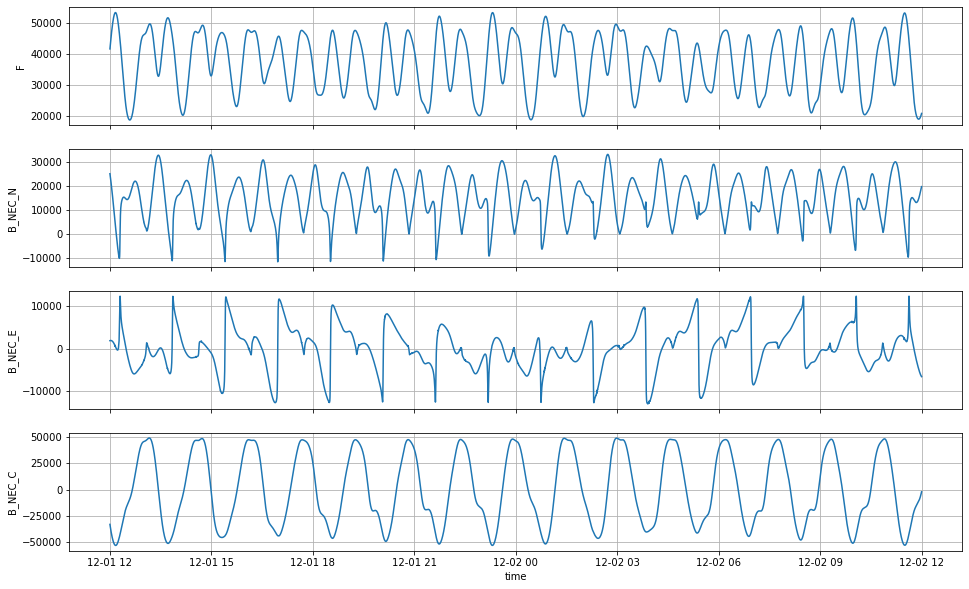

In [16]:
fig, axs = plt.subplots(4, 1, figsize=(16, 10), sharex=True)

axs[0].plot(df.index, df['F'])
axs[0].grid()
axs[0].set_ylabel('F')

axs[1].plot(df.index, df['B_NEC_N'])
axs[1].grid()
axs[1].set_ylabel('B_NEC_N')

axs[2].plot(df.index, df['B_NEC_E'])
axs[2].grid()
axs[2].set_ylabel('B_NEC_E')

axs[3].plot(df.index, df['B_NEC_C'])
axs[3].grid()
axs[3].set_xlabel('time')
axs[3].set_ylabel('B_NEC_C')

plt.show()

# Useful links

## VirES-related documentation:
- Swarm VRE: https://vre.vires.services/
- Python client (`viresclient`) documentation: https://viresclient.readthedocs.io/
- viresclient examples: https://nbviewer.jupyter.org/github/smithara/viresclient_examples/tree/master/

## Python-related documentation
- Python tutorial (from the official website): https://docs.python.org/3/tutorial/index.html
- NumPy reference: https://docs.scipy.org/doc/numpy/reference/
- SciPy reference: https://docs.scipy.org/doc/scipy/reference/
- Matplotlib documentation: https://matplotlib.org/contents.html#
- Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/#
- xarray documentation: http://xarray.pydata.org/en/stable/